In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import json

from sklearn.model_selection import train_test_split

fig_dpi = 200

%load_ext tensorboard

# Scratchpad
Testbed

In [2]:
data = pd.read_csv('features.csv', header=None).T
data.columns = ['Clump thickness', 'Uniformity of cell size', 'Uniformity of cell shape', 'Marginal adhesion', 'Single epithelial cell size', 'Bare nuclei', 'Bland chomatin', 'Normal nucleoli', 'Mitoses']
labels = pd.read_csv('targets.csv', header=None).T
labels.columns = ['Benign', 'Malignant']

In [3]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.5, stratify=labels)

In [9]:
layers = [tf.keras.layers.InputLayer(input_shape=(9,)), 
          tf.keras.layers.Dense(50, activation='sigmoid'), 
          tf.keras.layers.Dense(2, activation='softmax')]

model = tf.keras.models.Sequential(layers)
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
e=50
history = model.fit(data_train, labels_train, epochs=e, validation_split=0.1)

Epoch 1/50
10/10 [==============================] - 0s 16ms/step - loss: 0.6577 - accuracy: 0.6181 - val_loss: 0.6124 - val_accuracy: 0.6857


In [ ]:
model.evaluate(data_test, 
               labels_test, 
               batch_size=128)

In [ ]:
json.loads(model.to_json())

In [8]:
model.__dict__

{'_self_setattr_tracking': True,
 '_is_model_for_instrumentation': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': False,
 '_instrumented_keras_model_class': True,
 '_trainable': True,
 '_stateful': False,
 'built': True,
 '_build_input_shape': TensorShape([None, 9]),
 '_saved_model_inputs_spec': TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_1'),
 '_input_spec': None,
 '_supports_masking': True,
 '_name': 'sequential',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x1e9b3938c70>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x000001E9CF471E40>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': False,
 '_layers': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x1e9cf471eb0>,
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': [],
 '_e

In [ ]:
model.optimizer.get_config()

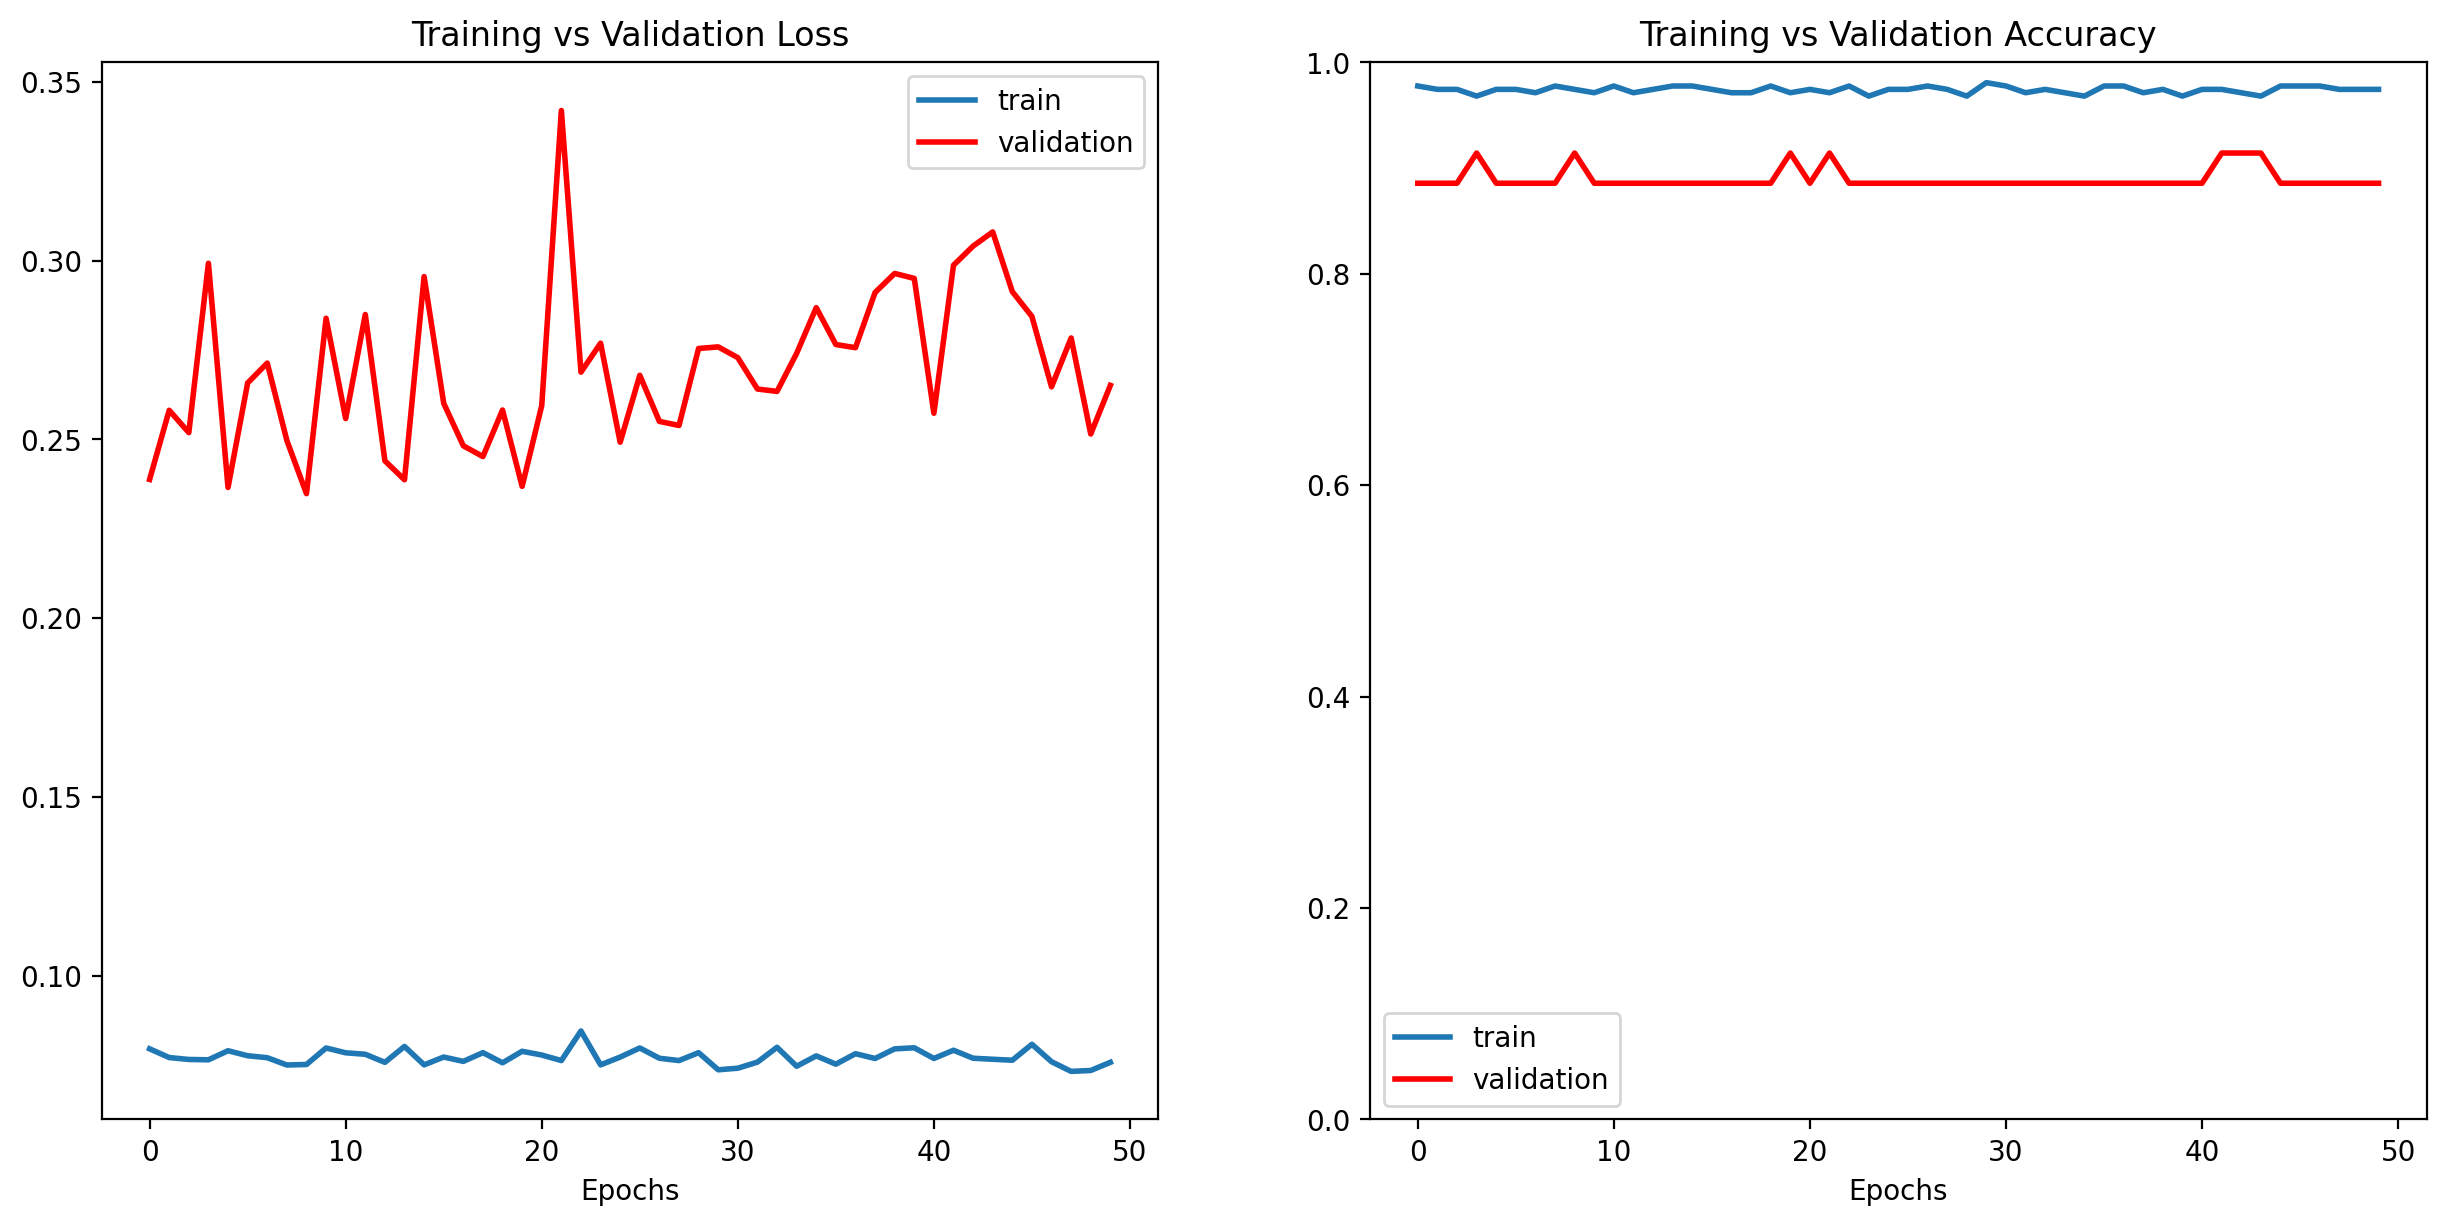

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.set_dpi(fig_dpi)

ax = axes[0]
ax.set_title("Training vs Validation Loss")
ax.plot(history.history['loss'], label="train", lw=2)
ax.plot(history.history['val_loss'], label="validation", lw=2, c=(1,0,0))
ax.set_xlabel("Epochs")
ax.legend()

ax = axes[1]
ax.set_title("Training vs Validation Accuracy")
ax.plot(history.history['accuracy'], label="train", lw=2)
ax.plot(history.history['val_accuracy'], label="validation", lw=2, c=(1,0,0))
ax.set_xlabel("Epochs")
ax.set_ylim(0, 1)
ax.legend()

plt.show()

In [7]:
tensor = model(data_test.to_numpy())

In [8]:
tensor

<tf.Tensor: shape=(350, 2), dtype=float32, numpy=
array([[0.9801853 , 0.01981472],
       [0.9926891 , 0.00731087],
       [0.9628417 , 0.03715829],
       [0.03073526, 0.9692647 ],
       [0.95234215, 0.04765787],
       [0.98602563, 0.01397439],
       [0.10280664, 0.8971934 ],
       [0.07686787, 0.9231321 ],
       [0.99190474, 0.00809523],
       [0.99078685, 0.00921312],
       [0.9831904 , 0.01680959],
       [0.99190474, 0.00809523],
       [0.98902273, 0.01097724],
       [0.98902273, 0.01097724],
       [0.98237324, 0.01762678],
       [0.98882884, 0.01117116],
       [0.01222708, 0.9877729 ],
       [0.97519624, 0.02480372],
       [0.99190474, 0.00809523],
       [0.08153479, 0.9184652 ],
       [0.9928901 , 0.00710991],
       [0.05978837, 0.94021165],
       [0.9801853 , 0.01981472],
       [0.09358412, 0.9064159 ],
       [0.9801853 , 0.01981472],
       [0.99190474, 0.00809523],
       [0.5003021 , 0.49969792],
       [0.9815221 , 0.01847788],
       [0.11047691, 0.8895

In [9]:
tf.math.round(tensor)

<tf.Tensor: shape=(350, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]

In [10]:
tf.constant([1, 0]) + tf.constant([1, 0])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 0])>

In [11]:
tf.constant([1, 0]) == tf.constant([0, 1])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([False, False])>

In [12]:
for c in tf.constant(labels_test)[:5]:
    print(c)
    print(c == tf.constant([1, 0], dtype='int64'))
    print(tf.math.argmax(c))
    print()

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor([0 1], shape=(2,), dtype=int64)
tf.Tensor([False False], shape=(2,), dtype=bool)
tf.Tensor(1, shape=(), dtype=int64)

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)



In [13]:
tf.math.reduce_sum(tf.constant([[0, 1], [0, 1]]), axis=0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 2])>

In [9]:
np.linspace(5, 150, num=1)

array([5.])